# PREDICTION

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from utilis import *

## Importowanie danych, usunięcie zbędnych kolumn.

In [2]:
data = pd.read_csv('dane_po_EDA.csv')

In [3]:
data.drop([data.columns[0]], axis=1, inplace=True)

In [4]:
data

,track,artist,album,artist pop,track pop,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year,new genre
0,Desperado,Rihanna,ANTI (Deluxe),87,71,186466,0.680,0.609,-5.222,0.0440,0.323000,0.000000,0.1020,0.325,94.350,2016,pop
1,Empire State Of Mind,JAY-Z,The Blueprint 3,80,83,276920,0.491,0.956,-1.538,0.3920,0.029500,0.000000,0.4600,0.811,173.585,2009,hip hop
2,ARE WE STILL FRIENDS?,"Tyler, The Creator",IGOR,82,81,265480,0.216,0.497,-8.025,0.0371,0.128000,0.000002,0.1110,0.313,187.308,2019,hip hop
3,i love you,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",86,81,291796,0.421,0.131,-18.435,0.0382,0.952000,0.004530,0.1090,0.120,137.446,2019,pop
4,Bohemian Rhapsody - Remastered 2011,Queen,A Night At The Opera (2011 Remaster),81,80,354320,0.411,0.404,-9.928,0.0511,0.271000,0.000000,0.3000,0.226,71.068,1975,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,My Sacrifice,Creed,Weathered,68,73,294600,0.320,0.880,-6.035,0.0504,0.000101,0.000004,0.0760,0.257,146.349,2001,metal
2118,Hemorrhage (In My Hands),Fuel,Something Like Human,53,61,236866,0.301,0.823,-4.072,0.0433,0.000144,0.000309,0.0833,0.372,152.017,2000,metal
2119,A Beautiful Lie,Thirty Seconds To Mars,A Beautiful Lie,67,51,245306,0.479,0.929,-5.106,0.0921,0.002910,0.293000,0.1710,0.344,159.949,2005,rock
2120,Wake Me up When September Ends,Green Day,American Idiot,78,76,285653,0.546,0.814,-5.146,0.0314,0.023000,0.000000,0.0972,0.146,104.980,2004,rock


In [5]:
df = data.drop(columns=['track', 'album','artist'])

# One hot encoding
Ponieważ mamy kilka rodzajów gatunków i są one zakodowane jako wartości string - używam one hot encoding aby zakodować je i móc analizować w dalszym procesie predykcji.

In [6]:
encoded_data = pd.get_dummies(df, columns=['new genre'], drop_first=True, dtype=int)

In [7]:
encoded_data2 = pd.get_dummies(data, columns=['new genre'], drop_first=True, dtype=int)
encoded_data2.to_csv('spotify_data_encoded2.csv')

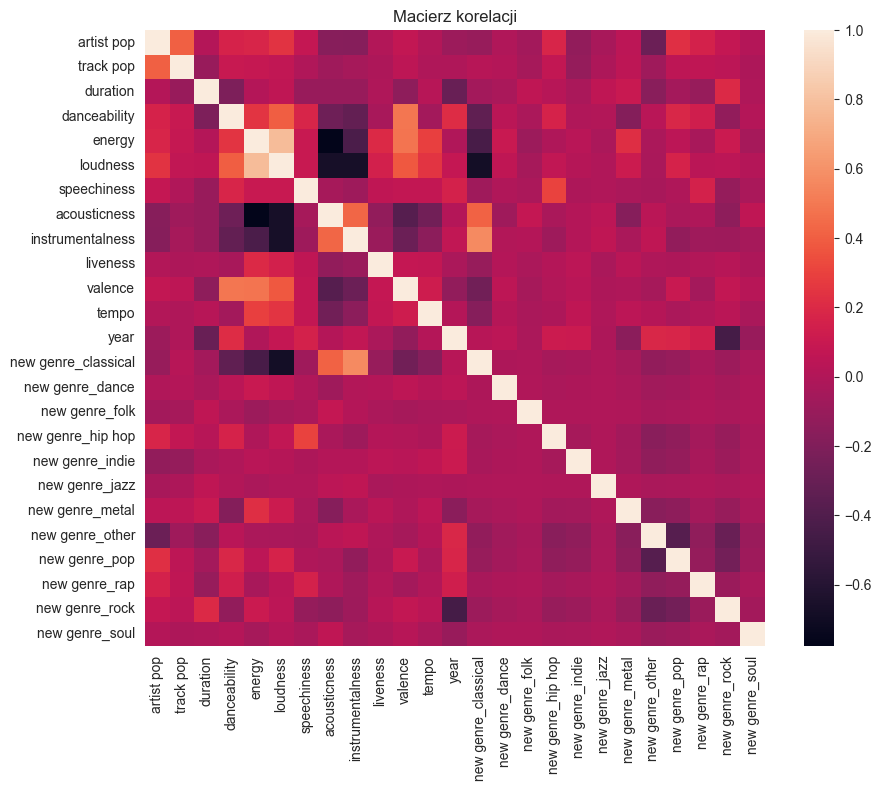

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_data.corr(), annot=False, fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

## Sprawdzenie skorelowanych kolumn i usunięcie tych, których informacje są zawarte w innych cechach i możemy je usunąć, tzn. usuwam te które mają z kilkoma innymi cechami wysoką korelacje. 

In [9]:
cor_features(encoded_data)

Pairs of highly correlated features:
('acousticness', 'energy', 0.7778653706571921)
('acousticness', 'loudness', 0.6702157700395519)
('instrumentalness', 'loudness', 0.6734956210013407)
('new genre_classical', 'loudness', 0.6819621263159126)
('loudness', 'energy', 0.7799460045774012)


In [10]:
columns_to_drop = ['instrumentalness', 'acousticness']
encoded_data.drop(columns=columns_to_drop, inplace=True)

In [11]:
target = encoded_data['track pop']
encoded_data.drop(columns='track pop', inplace=True)
encoded_data['target'] = target
encoded_data

,artist pop,duration,danceability,energy,loudness,speechiness,liveness,valence,tempo,year,...,new genre_hip hop,new genre_indie,new genre_jazz,new genre_metal,new genre_other,new genre_pop,new genre_rap,new genre_rock,new genre_soul,target
0,87,186466,0.680,0.609,-5.222,0.0440,0.1020,0.325,94.350,2016,...,0,0,0,0,0,1,0,0,0,71
1,80,276920,0.491,0.956,-1.538,0.3920,0.4600,0.811,173.585,2009,...,1,0,0,0,0,0,0,0,0,83
2,82,265480,0.216,0.497,-8.025,0.0371,0.1110,0.313,187.308,2019,...,1,0,0,0,0,0,0,0,0,81
3,86,291796,0.421,0.131,-18.435,0.0382,0.1090,0.120,137.446,2019,...,0,0,0,0,0,1,0,0,0,81
4,81,354320,0.411,0.404,-9.928,0.0511,0.3000,0.226,71.068,1975,...,0,0,0,0,0,0,0,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,68,294600,0.320,0.880,-6.035,0.0504,0.0760,0.257,146.349,2001,...,0,0,0,1,0,0,0,0,0,73
2118,53,236866,0.301,0.823,-4.072,0.0433,0.0833,0.372,152.017,2000,...,0,0,0,1,0,0,0,0,0,61
2119,67,245306,0.479,0.929,-5.106,0.0921,0.1710,0.344,159.949,2005,...,0,0,0,0,0,0,0,1,0,51
2120,78,285653,0.546,0.814,-5.146,0.0314,0.0972,0.146,104.980,2004,...,0,0,0,0,0,0,0,1,0,76


# Podział danych na treningowe i testowe

In [12]:
from sklearn.model_selection import train_test_split

X = encoded_data.iloc[:, :-1].values
y = encoded_data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Standaryzacja danych testowych i treningowych 

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train[:, :10])
x_test_scaled = scaler.transform(X_test[:, :10])
X_train[:, :10] = x_train_scaled
X_test[:, :10] = x_test_scaled

In [14]:
X_train

array([[-0.61338809, -1.26309414, -2.5141043 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.46147453, -0.50670267,  0.09514756, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40490281,  3.51867667, -1.37584007, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.17861594,  0.02321233, -1.20072249, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23518766, -0.71383462, -0.96723239, ...,  0.        ,
         0.        ,  0.        ],
       [-3.27225877, -1.37007834,  1.04661971, ...,  0.        ,
         0.        ,  0.        ]])

# Modele liniowe - używam 3 modeli liniowych, po kolei od 1 do 3 stopnia. 
Jak dobierać współczynniki? 
Dla danych treningowych \( X \) (macierz cech) i \( y \) (wektor wartości docelowych), możemy obliczyć wektor współczynników regresji \( theta \) za pomocą następującego wzoru:

\[ \theta = (X^T X)^{-1} X^T y \]

Gdzie:
- \( X \) to macierz cech z dodaną kolumną jedynek dla wyrazu wolnego (bias term).
- \( X^T \) to transpozycja macierzy \( X \).
- \( (X^T X)^{-1} \) to odwrotność macierzy \( X^T X \).
- \( y \) to wektor wartości docelowych.

![model](https://miro.medium.com/v2/resize:fit:1200/1*_UaCxPswsCxkj9JzYXCiWg.png)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = [1, 2, 3]
model_pol_1 = make_pipeline(PolynomialFeatures(degree[0]), LinearRegression())
model_pol_2 = make_pipeline(PolynomialFeatures(degree[1]), LinearRegression())
model_pol_3 = make_pipeline(PolynomialFeatures(degree[2]), LinearRegression())

# Random Forest
Hiperparametry dobieram używając Grid Search, w ten sposób wybieram ilość drzew i maksymalną głębokość tak, aby funkcja kosztu była najmiejsza. W kodzie poniżej używam funkcji najmniejszych kwadratów.  


![Drzewo](https://ars.els-cdn.com/content/image/1-s2.0-S1270963820310002-gr006.jpg)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  # różne wartości liczby drzew
    'max_depth': [3, 4, 5] # głębokość 
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)

# Najlepszy wynik
print("Najlepszy wynik:", -grid_search.best_score_)

Najlepsze parametry: {'max_depth': 5, 'n_estimators': 100}
Najlepszy wynik: 658.9449679050906


In [17]:
model_rf = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], random_state=42)

# XGBOOST
Jak działa? 
- XGBoost działa poprzez iteracyjne dodawanie drzew decyzyjnych, z których każde koryguje błędy popełnione przez poprzednie drzewa, minimalizując funkcję straty. Każde drzewo jest dopasowywane do gradientów błędów, a ostateczna predykcja jest sumą wszystkich drzew, z uwzględnieniem mechanizmów regularizacji, aby zapobiegać przeuczeniu.


![xgboost](https://miro.medium.com/v2/resize:fit:1000/0*zdmqFZ2nooBRedqC.png)

In [18]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

model_xgb = XGBRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], random_state=42)

Best parameters found: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Best score: -648.8752105193046


# MLP

Mała sieć neuronowa, która na wejściu przyjmuje 22 cechy, następnie mamy 2 warstwy ukryte (jedna ma 64 węzły, druga 32), na wyjściu uzyskujemy predykowaną wartość popularności piosenki. Jako funkcję straty użyłam funkcję najmniejszych kwadratów. Ilość epok uczenia to 100, a batch_size 10. Batch size odnosi się do liczby przykładów danych, które są przetwarzane jednocześnie podczas jednej iteracji w procesie trenowania modelu uczenia maszynowego. 

Przykładowy schemat: 

![siec](https://vitalflux.com/wp-content/uploads/2023/02/Sklearn-Neural-Network-MLPRegressor-Regression-Model-.png)

In [19]:
import tensorflow as tf
from scikeras.wrappers import KerasRegressor

y_train = y_train.astype(float)
y_test = y_test.astype(float)

model_mlp = tf.keras.Sequential([
    tf.keras.Input(shape=(22,)),  # Warstwa wejściowa
    tf.keras.layers.Dense(64, activation='relu'),  # Warstwa wejściowa
    tf.keras.layers.Dense(32, activation='relu'),  # Ukryta warstwa
    tf.keras.layers.Dense(1, activation='linear')  # Warstwa wyjściowa z liniową funkcją aktywacji
])

model_mlp.compile(optimizer='adam', loss='mean_squared_error')
model_mlp = KerasRegressor(model=model_mlp, epochs=100, batch_size=10, verbose=0)


## Walidacja
Do wykonania walidacji użyłam k krotną walidację krzyżową, a jako funkcję kosztu wybrałam najmniejsze kwadraty. Podział danych treningowych, czyli liczba "foldów" to standardowe 5. Następnie wyświetlam tabele błędów. Można zauważyć, że modele uczą się na każdym zbiorze podobnie, co jest dobrym sygnałem. Widać natomiast, że modele polynomial 2 i 3 kompletnie nie radzą sobie z zadaniem, a wartośc MSE jest znacząco większa od pozostałych modeli.


![kfold](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def score_of_model(model):
    mse_score = []

    for train_index, val_index in kf.split(X_train):
        x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(x_train_fold, y_train_fold)

        val_pred = model.predict(x_val_fold)
        mse = mean_squared_error(y_val_fold, val_pred)
        mse_score.append(mse)

    return mse_score

validation_tab = pd.DataFrame(columns=['Model', 'Score 1', 'Score 2', 'Score 3', 'Score 4', 'Score 5'])
scores = [np.mean(score_of_model(model_pol_1)), np.mean(score_of_model(model_pol_2)), np.mean(score_of_model(model_pol_3)), np.mean(score_of_model(model_rf)), np.mean(score_of_model(model_xgb)), np.mean(score_of_model(model_mlp))]
models= ['linear', 'polynomial (2 degree)', 'polynomial (3 degree)', 'random forest', 'XGBOOST', 'MLP']
validation_tab['Mean Score'] = scores
validation_tab['Model'] = models
validation_tab.iloc[0, 1:6] = score_of_model(model_pol_1)
validation_tab.iloc[1, 1:6] = score_of_model(model_pol_2)
validation_tab.iloc[2, 1:6] = score_of_model(model_pol_3)
validation_tab.iloc[3, 1:6] = score_of_model(model_rf)
validation_tab.iloc[4, 1:6] = score_of_model(model_xgb)
validation_tab.iloc[5, 1:6] = score_of_model(model_mlp)

validation_tab

,Model,Score 1,Score 2,Score 3,Score 4,Score 5,Mean Score
0,linear,670.613543,713.002105,690.612184,593.813501,683.948955,6.703981e+02
1,polynomial (2 degree),9430832477068771475849216.0,7558304253863308715622400.0,2346830954451768950390784.0,990303215825328283844608.0,532261571706435600384.0,4.065361e+24
2,polynomial (3 degree),880463088.80091,5361702451.309482,71321.262541,16697.168216,1497740166.090623,1.547999e+09
3,random forest,633.343733,708.025114,662.595883,576.046064,678.807711,6.517637e+02
4,XGBOOST,698.698894,838.728588,710.040789,713.835229,670.483971,7.263575e+02
5,MLP,436.736803,503.928692,333.099288,307.955025,243.587536,5.696821e+02


## Learning curve - pomoc przy sprawdzaniu overfittingu, czyli zjawiska przeuczenia danych. 
- Przeuczenie (Overfitting): Jeśli krzywa dla zbioru treningowego ma bardzo niski błąd, ale krzywa dla walidacji krzyżowej jest znacznie wyższa, oznacza to, że model jest zbyt skomplikowany i dopasowuje się do szumu w danych treningowych.
- Niedouczenie (Underfitting): Jeśli zarówno krzywa dla zbioru treningowego, jak i dla walidacji krzyżowej mają wysoki błąd, może to oznaczać, że model jest zbyt prosty, aby wyraźnie uchwycić zależności w danych. 

Dla większości ukazanych modeli różnice błędów nie są duże. Największe zanipokojenie można zobaczyć dla modelu MLP i XGBOOST, gdzie różnica jest największa. 

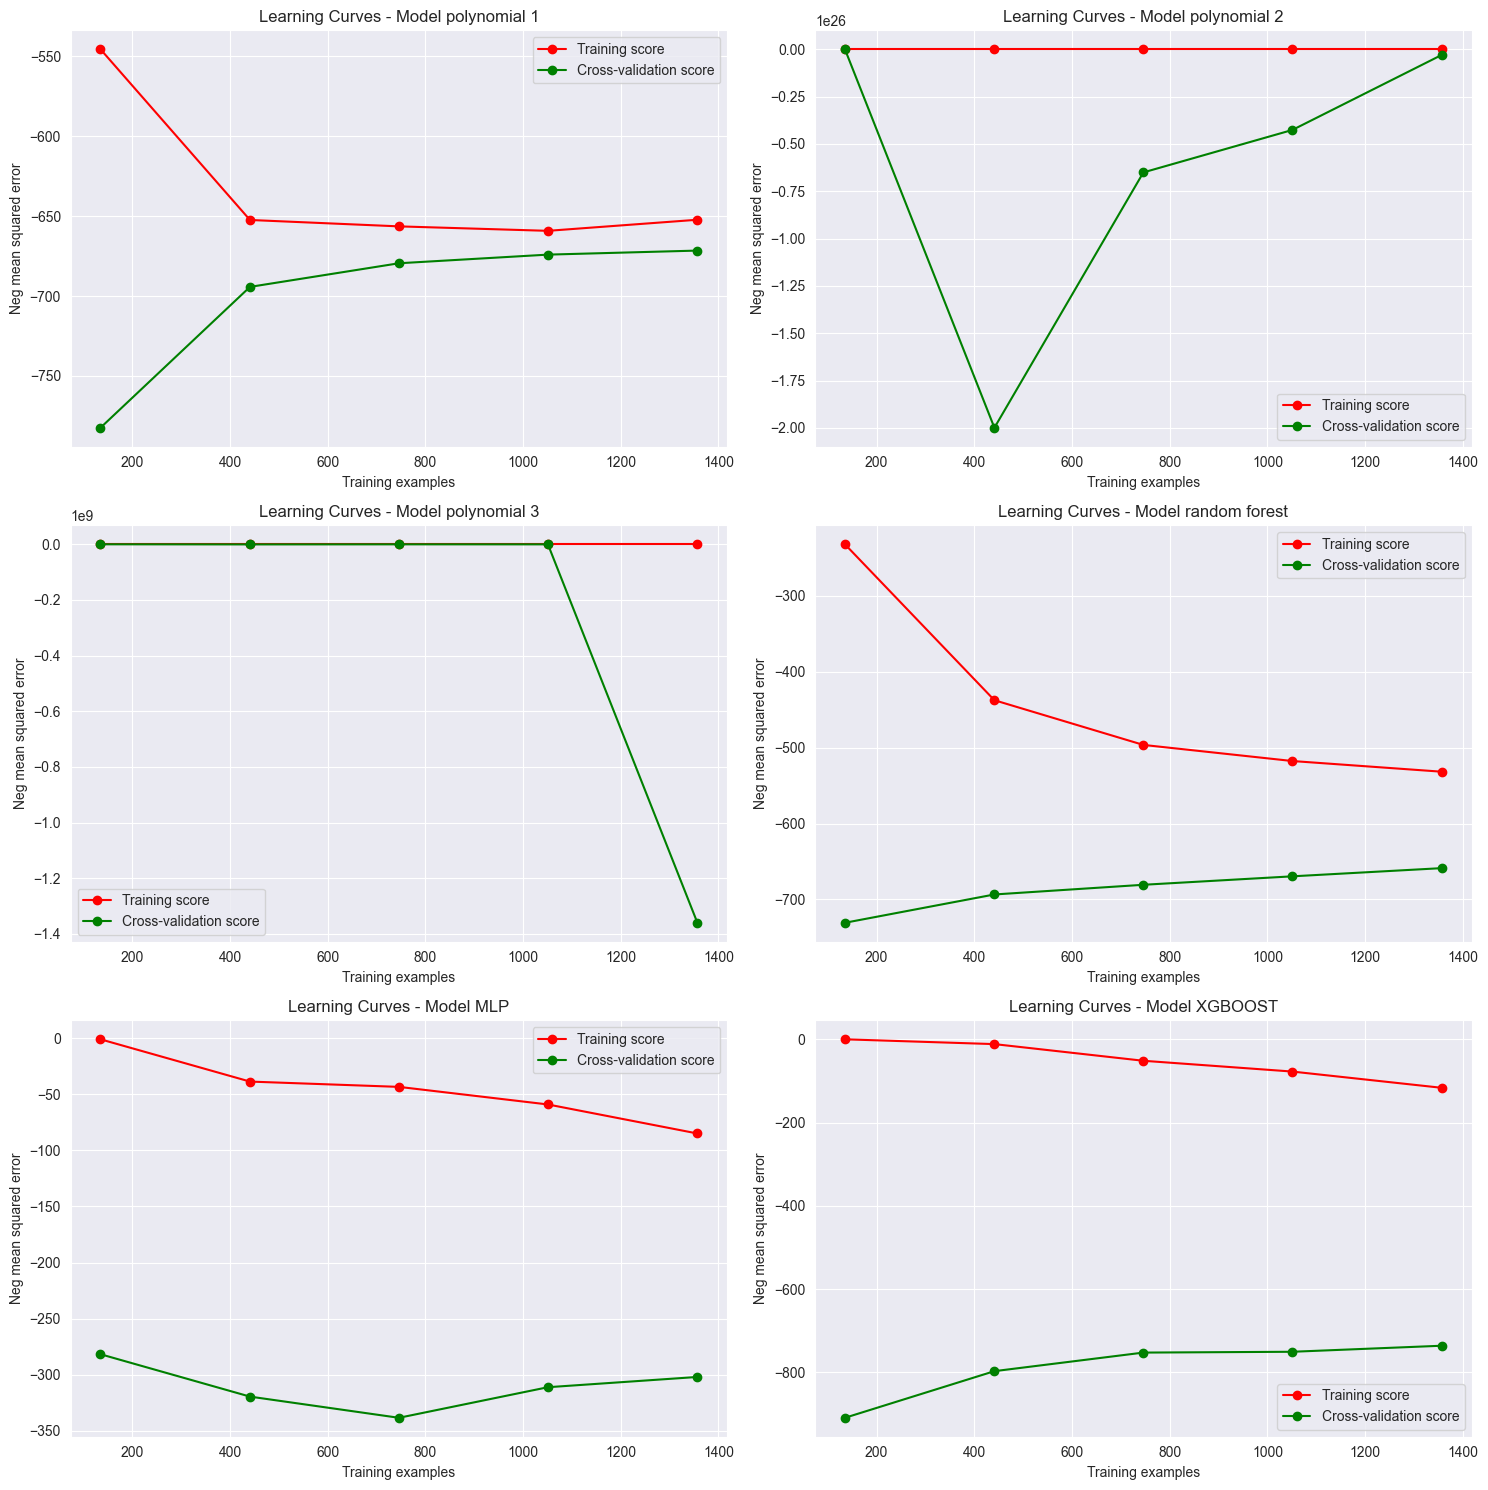

In [21]:
from sklearn.model_selection import learning_curve

def wykres_bledu(model, nazwa_modelu, ax, X=X_train, y=y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')
    
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
    ax.set_title(f'Learning Curves - {nazwa_modelu}')
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Neg mean squared error')
    ax.legend(loc='best')

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

wykres_bledu(model_pol_1, 'Model polynomial 1', axes[0, 0])
wykres_bledu(model_pol_2, 'Model polynomial 2', axes[0, 1])
wykres_bledu(model_pol_3, 'Model polynomial 3', axes[1, 0])
wykres_bledu(model_rf, 'Model random forest', axes[1, 1])
wykres_bledu(model_mlp,  'Model MLP', axes[2, 0])
wykres_bledu(model_xgb,  'Model XGBOOST', axes[2, 1])

plt.tight_layout()
plt.show()

# Ocena - ocene modelu dokonujemy sprawdzając 3 metryki: 

Mean Squared Error (MSE):
- MSE mierzy średnią kwadratową różnicę między wartościami przewidywanymi przez model a rzeczywistymi wartościami docelowymi. Jest to najczęściej używana metryka do oceny wydajności modeli regresyjnych.
- Wyższa wartość MSE oznacza większe błędy predykcji, gdzie każdy błąd jest kwadratowany przed uśrednieniem. MSE może być trudne do interpretacji, ponieważ jednostka miary to kwadrat jednostki miary zmiennej zależnej.

Mean Absolute Error (MAE):
- MAE mierzy średnią wartość bezwzględną różnic między wartościami przewidywanymi przez model a rzeczywistymi wartościami docelowymi. Jest to również metryka używana w ocenie wydajności modeli regresyjnych.
- MAE jest bardziej odporny na wartości odstające (outliers) niż MSE, ponieważ nie kwadratuje błędów. Jednostka miary MAE jest taka sama jak jednostka miary zmiennej zależnej.

Coefficient of Determination (R^2):
- R^2, znany również jako współczynnik determinacji, mierzy proporcję zmienności w zmiennej zależnej, która jest wyjaśniana przez model. Jest to metryka oceny wydajności modeli regresyjnych.
- R^2 przyjmuje wartości między 0 a 1, gdzie wartość 1 oznacza doskonałe dopasowanie modelu do danych, a wartość 0 oznacza, że model nie wyjaśnia zmienności w danych lepiej niż średnia wartość docelowa. Wartości ujemne mogą sugerować, że model jest gorzej dopasowany niż prosta średnia wartość docelowa.

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_pol_1.fit(X_train, y_train)
model_pol_2.fit(X_train, y_train)
model_pol_3.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_mlp.fit(X_train, y_train)

y_pred_pol_1 = model_pol_1.predict(X_test)
y_pred_pol_2 = model_pol_2.predict(X_test)
y_pred_pol_3 = model_pol_3.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
predictions = model_mlp.predict(X_test)

lista_mse = [mean_squared_error(y_test, y_pred_pol_1), mean_squared_error(y_test, y_pred_pol_2),  mean_squared_error(y_test, y_pred_pol_3), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_xgb), mean_squared_error(y_test, predictions)]
lista_mae = [mean_absolute_error(y_test, y_pred_pol_1), mean_absolute_error(y_test, y_pred_pol_2),  mean_absolute_error(y_test, y_pred_pol_3), mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_xgb), mean_absolute_error(y_test, predictions)]
lista_r = [r2_score(y_test, y_pred_pol_1), r2_score(y_test, y_pred_pol_2),  r2_score(y_test, y_pred_pol_3), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb), r2_score(y_test, predictions)]
models= ['linear', 'polynomial (2 degree)', 'polynomial (3 degree)', 'random forest', 'XGBOOST', 'MLP']

error_tab  = pd.DataFrame()
error_tab['Model'] = models
error_tab['MSE'] = lista_mse
error_tab['MAE'] = lista_mae
error_tab['R^2'] = lista_r

In [35]:
error_tab

,Model,MSE,MAE,R^2
0,linear,6.520649e+02,1.967607e+01,1.869639e-01
1,polynomial (2 degree),6.646627e+22,1.797378e+10,-8.287439e+19
2,polynomial (3 degree),4.444156e+23,1.057250e+11,-5.541257e+20
3,random forest,6.156997e+02,1.885790e+01,2.323064e-01
4,XGBOOST,6.629870e+02,1.897182e+01,1.733455e-01
5,MLP,1.381084e+03,2.763827e+01,-7.220239e-01


# Najlepszy wynik uzyskuję random forest. 

## Dodanie PCA
Sprawdzam jak zmieniłyby się błędy dodając PCA, czyli zmniejszając wymiary z około 20 do jedynie 5. Głównym celem jest sprawdzenie czy wyniki na krzywych uczących będą odbiegać od tych uzyskanych wcześniej, czyli czy zmniejszy się potencjalny overfotting. 

In [24]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(n_components=5)  
regression_model_pca = LinearRegression()
rf_model_pca =  RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], random_state=42)
xgb_model_pca = XGBRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], random_state=42)
mlp_model_pca = KerasRegressor(model=model_mlp, epochs=100, batch_size=10, verbose=0)

pipeline1 = Pipeline([('pca', pca), ('regression', regression_model_pca)])
pipeline1.fit(X_train, y_train)
predictions1 = pipeline1.predict(X_test)

pipeline2 = Pipeline([('pca', pca), ('random forest', rf_model_pca)])
pipeline2.fit(X_train, y_train)
predictions2 = pipeline2.predict(X_test)

pipeline3 = Pipeline([('pca', pca), ('xgboost', xgb_model_pca)])
pipeline3.fit(X_train, y_train)
predictions3 = pipeline3.predict(X_test)

def build_mlp():
    model = tf.keras.Sequential([
    tf.keras.Input(shape=(5,)),  # Warstwa wejściowa
    tf.keras.layers.Dense(16, activation='relu'),  # Warstwa wejściowa
    tf.keras.layers.Dense(8, activation='relu'),  # Ukryta warstwa
    tf.keras.layers.Dense(1, activation='linear')])  # Warstwa wyjściowa z liniową funkcją aktywacji
    model.compile(optimizer='adam', loss='mse')
    return model


mlp_model_pca = KerasRegressor(build_fn=build_mlp, epochs=100, batch_size=10, verbose=0)
pipeline4 = Pipeline([('pca', pca), ('mlp', mlp_model_pca)])
pipeline4.fit(X_train, y_train)
predictions4 = pipeline4.predict(X_test)

lista_mse_pca = [
    mean_squared_error(y_test, predictions1), 
    '-',
    '-',
    mean_squared_error(y_test, predictions2), 
    mean_squared_error(y_test, predictions3), 
    mean_squared_error(y_test, predictions4)
]

error_tab['MSE-PCA'] = lista_mse_pca

C:\Users\HP\PycharmProjects\spotify_project\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [25]:
error_tab

,Model,MSE,MAE,R^2,MSE-PCA
0,linear,6.520649e+02,1.967607e+01,1.869639e-01,729.732303
1,polynomial (2 degree),6.646627e+22,1.797378e+10,-8.287439e+19,-
2,polynomial (3 degree),4.444156e+23,1.057250e+11,-5.541257e+20,-
3,random forest,6.156997e+02,1.885790e+01,2.323064e-01,708.183887
4,XGBOOST,6.629870e+02,1.897182e+01,1.733455e-01,824.288513
5,MLP,1.381084e+03,2.763827e+01,-7.220239e-01,723.808998


Można zauważyć, że dla 3 modeli wynik się pogorszył, ponieważ mamy pewien brak informacji biorąc jedynie 5 wymiarów, ale co ciekawe dla modelu MLP, w którym podejrzewaliśmy overfitting, gdyż podcas walidacji wyniki były świetne, a dla modelu treningowego MSE była dość duzą, widać że PCA zadziałało pozytywnie i zmniejszyło MSE. 

### Otrzymane błędy są oczywiście większe niż wcześniej, ponieważ PCA zmniejsza wymiary, a więc tracimy pewne informacje, a nasz model zmniejsza overfitting i zwiększa bias. 

C:\Users\HP\PycharmProjects\spotify_project\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\HP\PycharmProjects\spotify_project\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\HP\PycharmProjects\spotify_project\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\HP\PycharmProjects\spotify_project\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn

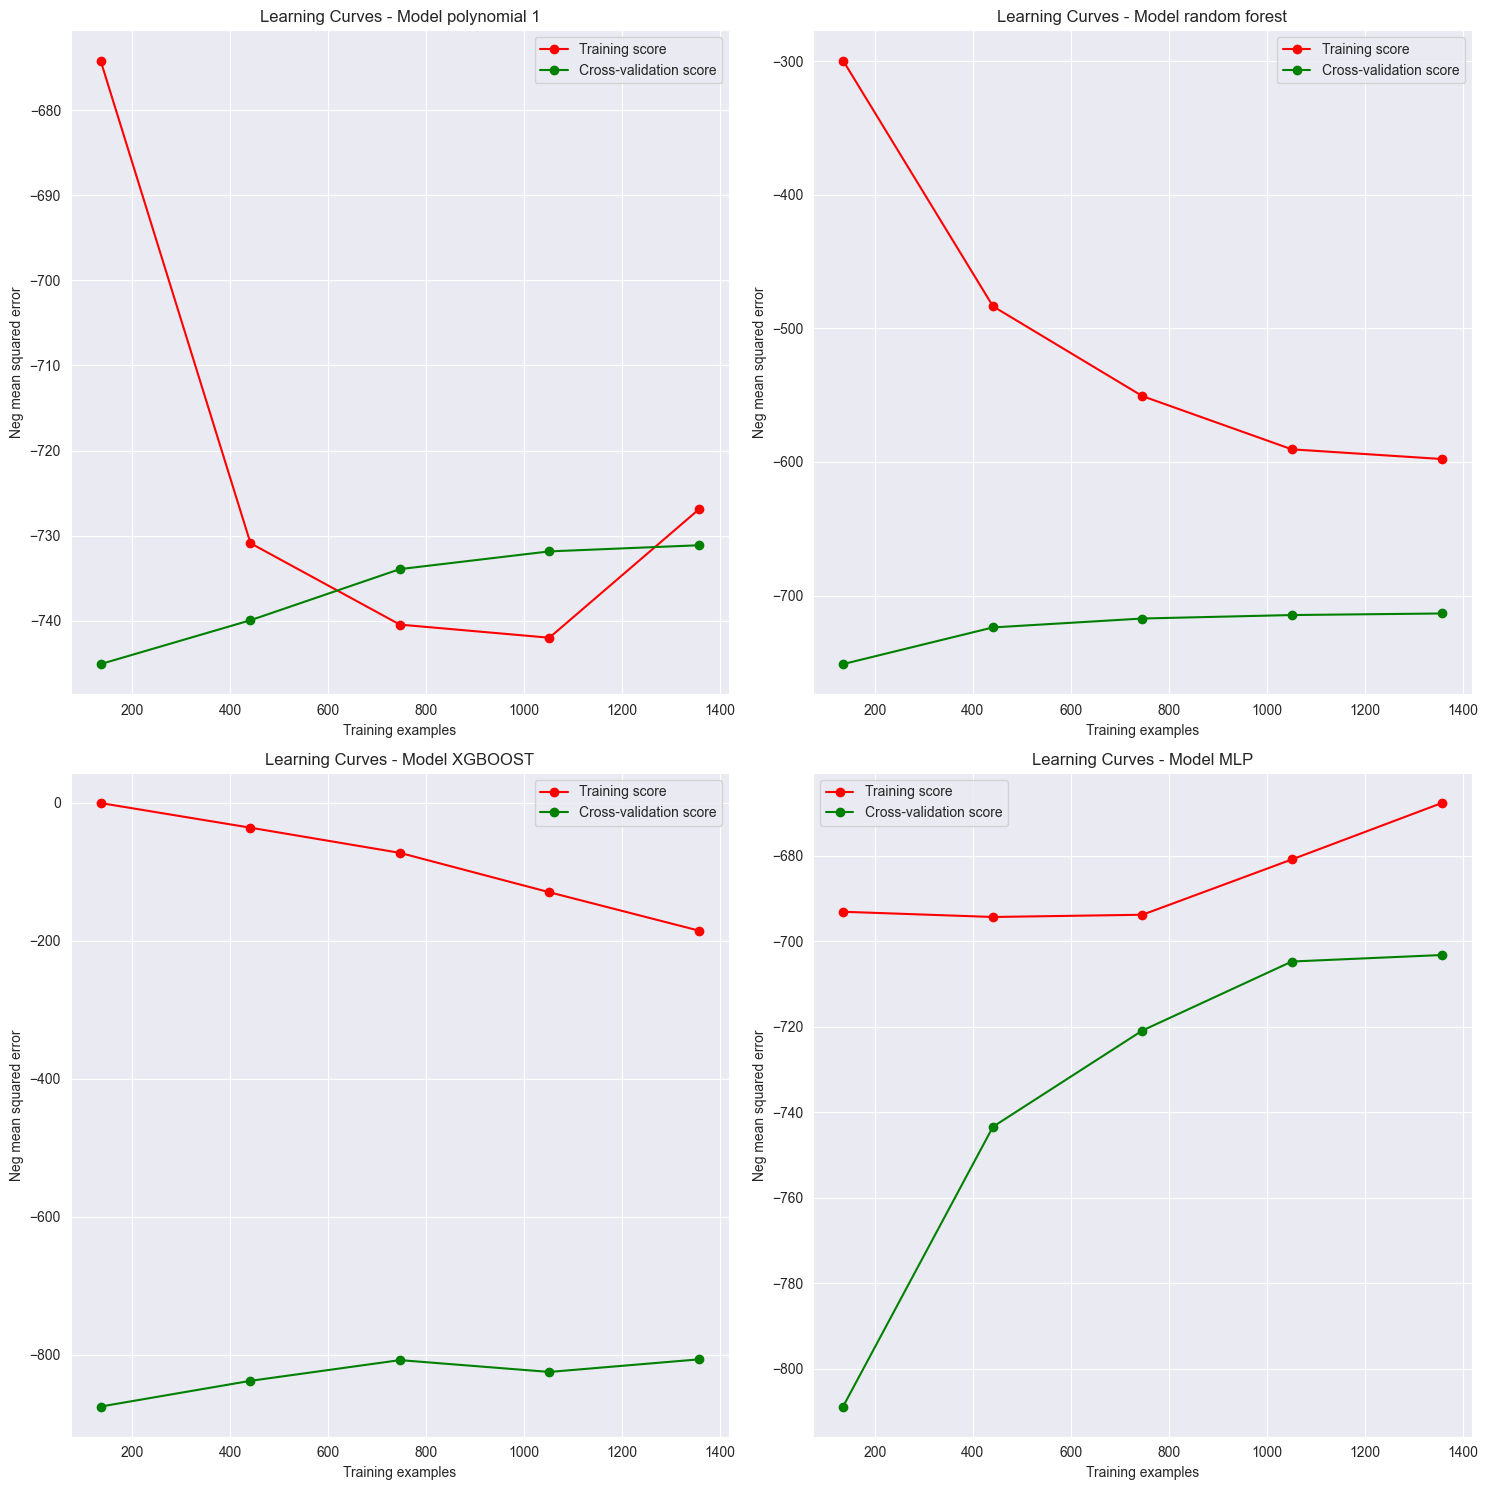

In [26]:
X_pca = pca.fit_transform(X_train)
def wykres_bledu(model, nazwa_modelu, ax, X=X_pca, y=y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')
    
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
    ax.set_title(f'Learning Curves - {nazwa_modelu}')
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Neg mean squared error')
    ax.legend(loc='best')
    
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

wykres_bledu(regression_model_pca, 'Model polynomial 1', axes[0, 0])
wykres_bledu(rf_model_pca, 'Model random forest', axes[0, 1])
wykres_bledu(xgb_model_pca,  'Model XGBOOST', axes[1, 0])
wykres_bledu(mlp_model_pca,  'Model MLP', axes[1, 1])


plt.tight_layout()
plt.show()

## Ocena wykresów. 

Aby zobaczyć jak prezentują sie wyniki, wyświetlam wykres wartości predykowanej w zależności od prawdziwej. Jeśli wykres układa się w przybliżeniu liniowo, to oznacza, że model dobrze przewiduje popularność piosenek. Można jedynie zauważyć sporo predykcji o wartości 0, może to wynikać z tego, iż dane nie są zrównoważone i najwięcej piosenek ma popularność 0. Niestety próba wykorzystania metody SMOGN do wyprodukowania nowych punktów i zrównoważenia zbioru nie powiodła się, gdyż dla tej metody, ze względu na dużą skalę popularności, dane były wystarczająco zróżnicowane. 

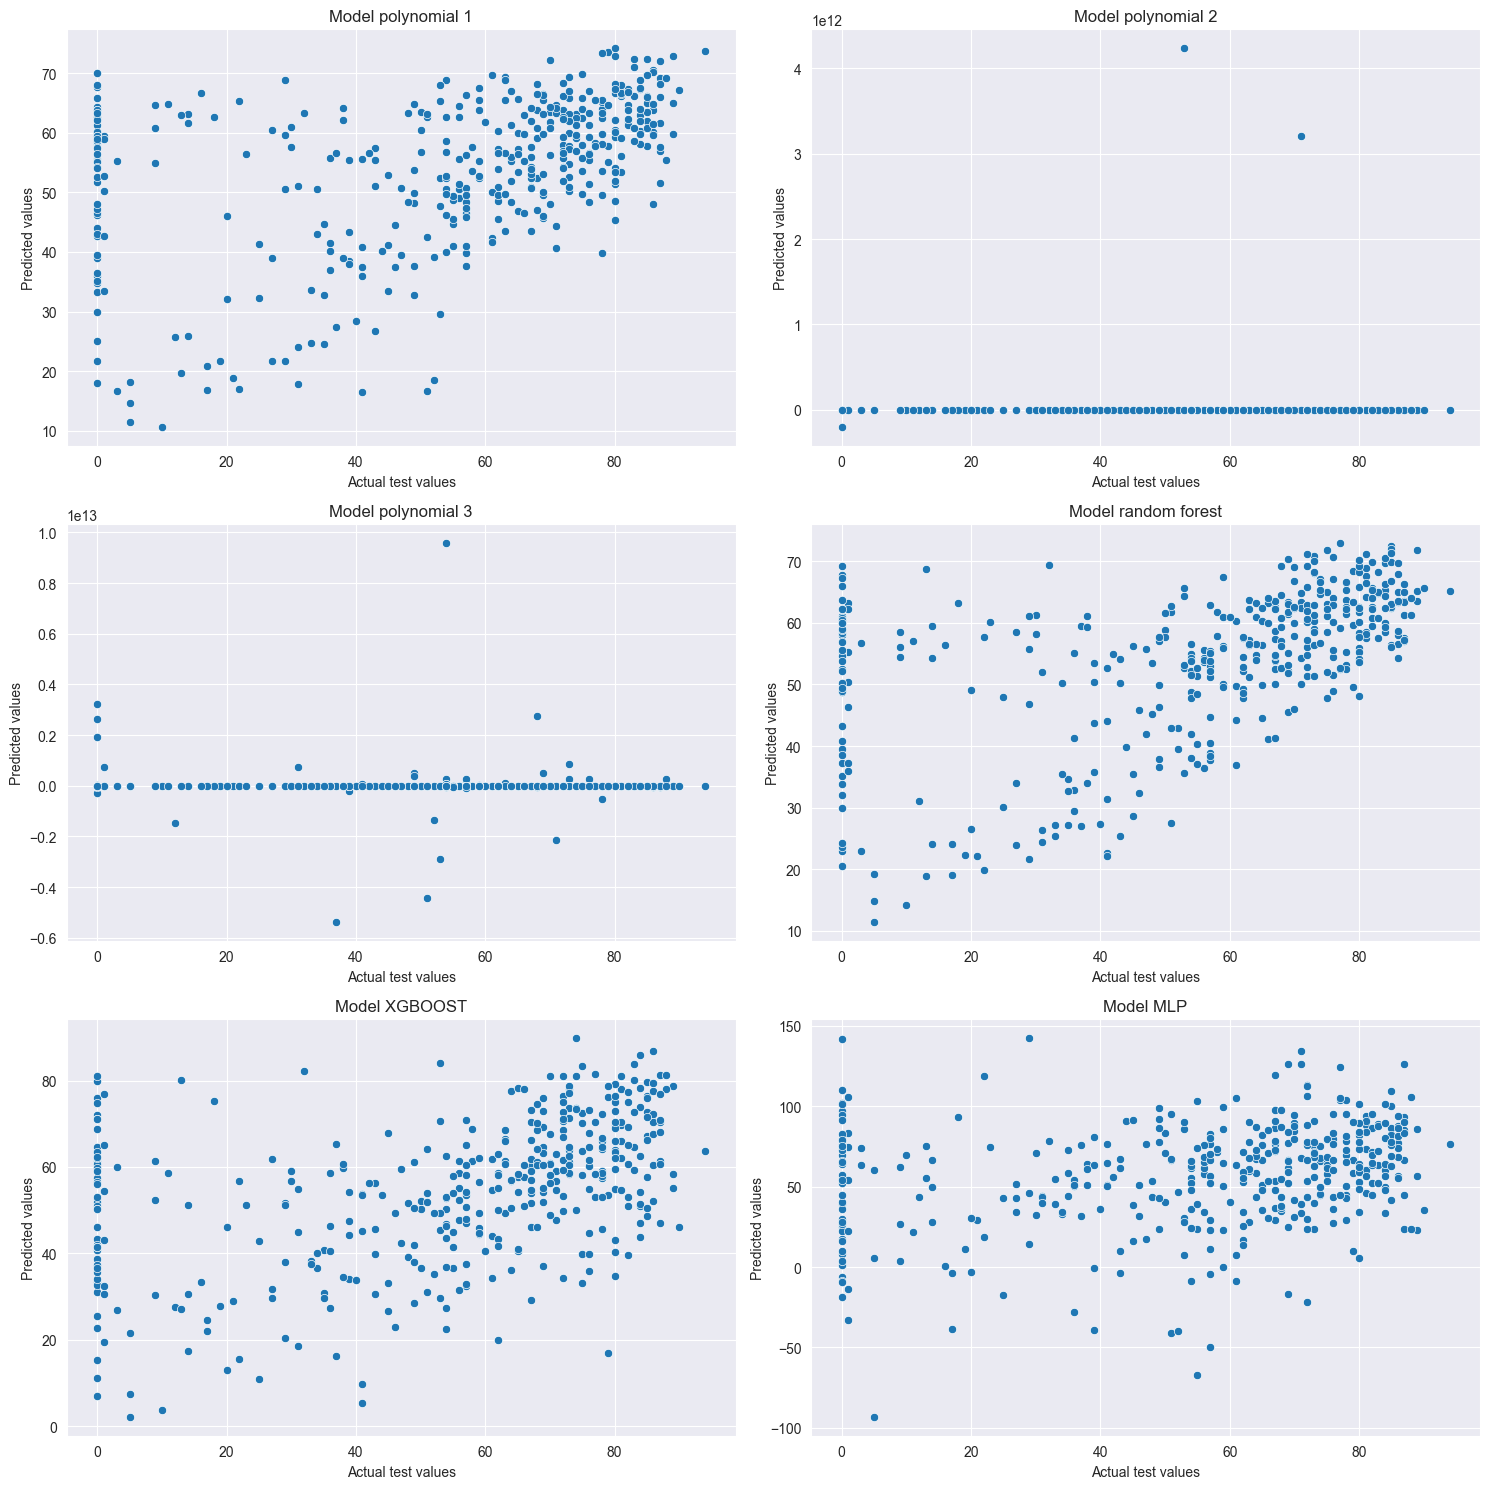

In [27]:
def wykres(y_test, y_pred, model_name, ax):
    sns.scatterplot(x=y_test, y=y_pred, ax=ax)
    ax.set(xlabel='Actual test values', ylabel=f'Predicted values')
    ax.set_title(f'{model_name}')
    
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

wykres(y_test, y_pred_pol_1, 'Model polynomial 1', axes[0, 0])
wykres(y_test, y_pred_pol_2, 'Model polynomial 2', axes[0, 1])
wykres(y_test, y_pred_pol_3, 'Model polynomial 3', axes[1, 0])
wykres(y_test, y_pred_rf, 'Model random forest', axes[1, 1])
wykres(y_test, y_pred_xgb, 'Model XGBOOST', axes[2, 0])
y_pred = predictions.flatten()
wykres(y_test, y_pred, 'Model MLP', axes[2, 1])

plt.tight_layout()
plt.show()

In [28]:
def tabela(y_pred):
    wyniki = pd.DataFrame()
    wyniki['y_pred'] = y_pred
    wyniki['y_true'] = y_test
    return wyniki

## Wykresy błędów słupkowe

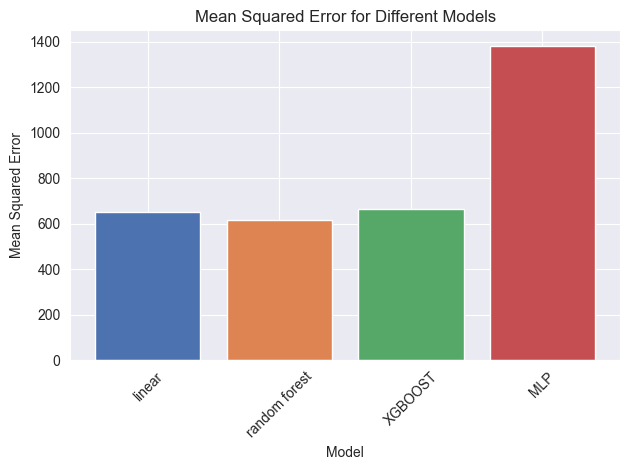

In [29]:
var = error_tab[(error_tab['Model'] != 'polynomial (3 degree)') & (error_tab['Model'] != 'polynomial (2 degree)')]
palette = sns.color_palette("deep", len(var))
plt.bar(var['Model'], var['MSE'], color=palette)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()

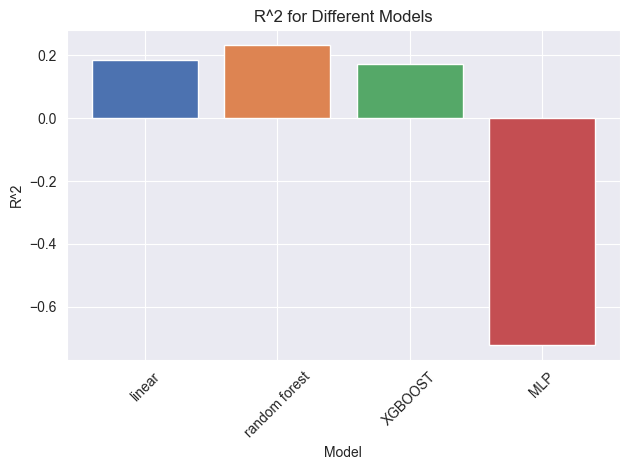

In [30]:
var = error_tab[(error_tab['Model'] != 'polynomial (3 degree)') & (error_tab['Model'] != 'polynomial (2 degree)')]
palette = sns.color_palette("deep", len(var))
plt.bar(var['Model'], var['R^2'], color=palette)
plt.xlabel('Model')
plt.ylabel('R^2')
plt.title('R^2 for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()

## Najlepszym modelem okazał się Random Forest, a więc to jego zapisujemy do pliku i wykorzystamy w aplikacji do predykcji popularności piosenki. 

In [31]:
import pickle
# Zapisanie modelu do pliku
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)